In [14]:
# import data from google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [16]:
# read csv data
sales_growth = pd.read_csv("/content/drive/My Drive/Project_Data/sales_per_month.csv")

# show data
sales_growth

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,delivered,2018-05-10 22:56:40,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-23 20:31:55,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-28 12:22:22,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-16 21:59:40,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,computers_accessories


In [17]:
# count missing value
sales_growth.isna().sum()

order_id                            0
order_status                        0
order_delivered_customer_date    2454
order_item_id                       0
product_id                          0
product_category_name            1603
product_category_name_english    1627
dtype: int64

In [18]:
# count missing value
sales_growth.isna().sum()/len(sales_growth)*100

order_id                         0.000000
order_status                     0.000000
order_delivered_customer_date    2.178429
order_item_id                    0.000000
product_id                       0.000000
product_category_name            1.422992
product_category_name_english    1.444296
dtype: float64

In [19]:
# find mode
mod_order_delivered_customer_date = sales_growth["order_delivered_customer_date"].mode()[0]
mod_product_category_name = sales_growth["product_category_name"].mode()[0]
mod_product_category_name_english = sales_growth["product_category_name_english"].mode()[0]

# input mode on the missing value
sales_growth["order_delivered_customer_date"] = sales_growth["order_delivered_customer_date"].fillna(mod_order_delivered_customer_date)
sales_growth["product_category_name"] = sales_growth["product_category_name"].fillna(mod_product_category_name)
sales_growth["product_category_name_english"] = sales_growth["product_category_name_english"].fillna(mod_product_category_name_english)

In [20]:
# check missing value
sales_growth.isna().sum()

order_id                         0
order_status                     0
order_delivered_customer_date    0
order_item_id                    0
product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

In [21]:
# check outlier
sales_growth.describe()

,order_item_id
count,112650.000000
mean,1.197834
std,0.705124
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


In [22]:
# show data
sales_growth

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,delivered,2018-05-10 22:56:40,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-23 20:31:55,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-28 12:22:22,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-16 21:59:40,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,computers_accessories


In [23]:
# check duplicate
sales_growth.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
112645    False
112646    False
112647    False
112648    False
112649    False
Length: 112650, dtype: bool

In [24]:
# remove duplicate
sales_growth = sales_growth.drop_duplicates(subset=["order_id"])

In [25]:
# show data
sales_growth

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,delivered,2018-05-10 22:56:40,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-23 20:31:55,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-28 12:22:22,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-16 21:59:40,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,computers_accessories


In [26]:
# check inconsistent format
sales_growth["product_category_name"].unique()

array(['cool_stuff', 'pet_shop', 'moveis_decoracao', 'perfumaria',
       'ferramentas_jardim', 'utilidades_domesticas', 'telefonia',
       'beleza_saude', 'livros_tecnicos', 'fashion_bolsas_e_acessorios',
       'cama_mesa_banho', 'esporte_lazer', 'consoles_games',
       'moveis_escritorio', 'malas_acessorios', 'alimentos',
       'agro_industria_e_comercio', 'eletronicos',
       'informatica_acessorios', 'construcao_ferramentas_construcao',
       'audio', 'bebes', 'construcao_ferramentas_iluminacao',
       'brinquedos', 'papelaria', 'industria_comercio_e_negocios',
       'relogios_presentes', 'automotivo', 'eletrodomesticos',
       'moveis_cozinha_area_de_servico_jantar_e_jardim', 'climatizacao',
       'casa_conforto', 'telefonia_fixa', 'portateis_casa_forno_e_cafe',
       'fraldas_higiene', 'sinalizacao_e_seguranca',
       'instrumentos_musicais', 'eletroportateis',
       'construcao_ferramentas_jardim', 'artes', 'casa_construcao',
       'livros_interesse_geral', 'artigo

In [27]:
# check inconsistent format
sales_growth["product_category_name_english"].unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto',
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'cine_p

In [28]:
# check inconsistent format & frequencies
sales_growth["product_category_name"].value_counts()

cama_mesa_banho                  10727
beleza_saude                      8796
esporte_lazer                     7681
informatica_acessorios            6660
moveis_decoracao                  6355
                                 ...  
la_cuisine                          12
cds_dvds_musicais                   12
fashion_roupa_infanto_juvenil        8
pc_gamer                             7
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64

In [29]:
# check inconsistent format & frequencies
sales_growth["product_category_name_english"].value_counts()

bed_bath_table               10748
health_beauty                 8796
sports_leisure                7681
computers_accessories         6660
furniture_decor               6355
                             ...  
arts_and_craftmanship           22
la_cuisine                      12
cds_dvds_musicals               12
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [30]:
# delete order status other than delivered
sales_growth = sales_growth[sales_growth["order_status"] == "delivered"]
sales_growth

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,delivered,2018-05-10 22:56:40,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-23 20:31:55,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-28 12:22:22,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-16 21:59:40,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,computers_accessories


In [31]:
# check value on order_status
sales_growth["order_status"].value_counts()

delivered    96478
Name: order_status, dtype: int64

In [32]:
# before parse_dates
sales_growth.head()

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools


In [33]:
# check data decription
sales_growth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   order_status                   96478 non-null  object
 2   order_delivered_customer_date  96478 non-null  object
 3   order_item_id                  96478 non-null  int64 
 4   product_id                     96478 non-null  object
 5   product_category_name          96478 non-null  object
 6   product_category_name_english  96478 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.9+ MB


In [34]:
#after parse_dates
sales_growth = sales_growth.copy()
sales_growth["order_delivered_customer_date"] = pd.to_datetime(sales_growth["order_delivered_customer_date"])
sales_growth.head()

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools


In [35]:
# check data decription
sales_growth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   order_status                   96478 non-null  object        
 2   order_delivered_customer_date  96478 non-null  datetime64[ns]
 3   order_item_id                  96478 non-null  int64         
 4   product_id                     96478 non-null  object        
 5   product_category_name          96478 non-null  object        
 6   product_category_name_english  96478 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.9+ MB


In [36]:
# show data
sales_growth.head()

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools


In [37]:
# extract datetime info from data
sales_growth = sales_growth.copy()
sales_growth['Year'] = sales_growth["order_delivered_customer_date"].dt.year
sales_growth['Month'] = sales_growth["order_delivered_customer_date"].dt.month

In [38]:
# show data
sales_growth

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english,Year,Month
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff,2017,9
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop,2017,5
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor,2018,1
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery,2018,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools,2017,3
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,delivered,2018-05-10 22:56:40,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares,2018,5
112646,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-23 20:31:55,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,computers_accessories,2018,7
112647,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-28 12:22:22,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,sports_leisure,2017,10
112648,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-16 21:59:40,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,computers_accessories,2017,8


In [39]:
# define a custom function to combine columns A and B
def combine_columns(row):
    return row["Year"] , row["Month"]

# apply the custom function to each row of the DataFrame
sales_growth["Year, Month"] = sales_growth.apply(combine_columns, axis=1)

# print the resulting DataFrame
sales_growth

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english,Year,Month,"Year, Month"
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff,2017,9,"(2017, 9)"
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop,2017,5,"(2017, 5)"
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor,2018,1,"(2018, 1)"
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery,2018,8,"(2018, 8)"
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools,2017,3,"(2017, 3)"
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,delivered,2018-05-10 22:56:40,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares,2018,5,"(2018, 5)"
112646,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-23 20:31:55,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,computers_accessories,2018,7,"(2018, 7)"
112647,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-28 12:22:22,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,sports_leisure,2017,10,"(2017, 10)"
112648,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-16 21:59:40,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,computers_accessories,2017,8,"(2017, 8)"


In [40]:
# delete outlier
sales_growth = sales_growth.loc[~sales_growth["Year, Month"].isin([(2018, 9), (2018, 10)])]
sales_growth

,order_id,order_status,order_delivered_customer_date,order_item_id,product_id,product_category_name,product_category_name_english,Year,Month,"Year, Month"
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff,2017,9,"(2017, 9)"
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop,2017,5,"(2017, 5)"
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor,2018,1,"(2018, 1)"
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery,2018,8,"(2018, 8)"
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools,2017,3,"(2017, 3)"
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,delivered,2018-05-10 22:56:40,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares,2018,5,"(2018, 5)"
112646,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-23 20:31:55,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,computers_accessories,2018,7,"(2018, 7)"
112647,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-28 12:22:22,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,sports_leisure,2017,10,"(2017, 10)"
112648,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-16 21:59:40,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,computers_accessories,2017,8,"(2017, 8)"


In [41]:
# check value on year, month
sales_growth["Year, Month"].value_counts()

(2018, 8)     8314
(2018, 4)     7850
(2017, 12)    7205
(2018, 5)     7111
(2018, 6)     6829
(2018, 3)     6824
(2018, 1)     6597
(2018, 2)     5850
(2018, 7)     5839
(2017, 11)    4670
(2017, 10)    4494
(2017, 8)     4302
(2017, 9)     3965
(2017, 5)     3751
(2017, 7)     3463
(2017, 6)     3223
(2017, 3)     2382
(2017, 4)     1849
(2017, 2)     1351
(2017, 1)      283
(2016, 10)     205
(2016, 11)      58
(2016, 12)       4
Name: Year, Month, dtype: int64

In [42]:
# delete column
sales_growth = sales_growth.drop(["order_delivered_customer_date", "product_category_name", "product_id"], axis = 1)

In [43]:
# show only the top 10 highest product category order based on objective 1
sales_growth = sales_growth.loc[sales_growth["product_category_name_english"].isin(["bed_bath_table", "health_beauty", "sports_leisure", "computers_accessories", "furniture_decor", "housewares", "watches_gifts", "telephony", "auto", "toys"])]
sales_growth

,order_id,order_status,order_item_id,product_category_name_english,Year,Month,"Year, Month"
2,000229ec398224ef6ca0657da4fc703e,delivered,1,furniture_decor,2018,1,"(2018, 1)"
5,00048cc3ae777c65dbb7d2a0634bc1ea,delivered,1,housewares,2017,5,"(2017, 5)"
6,00054e8431b9d7675808bcb819fb4a32,delivered,1,telephony,2017,12,"(2017, 12)"
8,0005a1a1728c9d785b8e2b08b904576c,delivered,1,health_beauty,2018,3,"(2018, 3)"
10,00061f2a7bc09da83e415a52dc8a4af1,delivered,1,health_beauty,2018,3,"(2018, 3)"
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,delivered,1,housewares,2018,5,"(2018, 5)"
112646,fffcd46ef2263f404302a634eb57f7eb,delivered,1,computers_accessories,2018,7,"(2018, 7)"
112647,fffce4705a9662cd70adb13d4a31832d,delivered,1,sports_leisure,2017,10,"(2017, 10)"
112648,fffe18544ffabc95dfada21779c9644f,delivered,1,computers_accessories,2017,8,"(2017, 8)"


In [44]:
# check value on product category
sales_growth["product_category_name_english"].value_counts()

bed_bath_table           10541
health_beauty             8600
sports_leisure            7484
computers_accessories     6497
furniture_decor           6206
housewares                5684
watches_gifts             5466
telephony                 4073
auto                      3792
toys                      3779
Name: product_category_name_english, dtype: int64

In [45]:
# set new index
sales_growth = sales_growth.set_index("order_id")
sales_growth.head()

,order_status,order_item_id,product_category_name_english,Year,Month,"Year, Month"
order_id,,,,,,
000229ec398224ef6ca0657da4fc703e,delivered,1,furniture_decor,2018,1,"(2018, 1)"
00048cc3ae777c65dbb7d2a0634bc1ea,delivered,1,housewares,2017,5,"(2017, 5)"
00054e8431b9d7675808bcb819fb4a32,delivered,1,telephony,2017,12,"(2017, 12)"
0005a1a1728c9d785b8e2b08b904576c,delivered,1,health_beauty,2018,3,"(2018, 3)"
00061f2a7bc09da83e415a52dc8a4af1,delivered,1,health_beauty,2018,3,"(2018, 3)"


In [46]:
# pivot data
piv = sales_growth.pivot_table(values="order_item_id", index=["product_category_name_english"], columns=["Year", "Month"], aggfunc="sum", fill_value=0, margins=True)
piv

Year                          2016        2017                               \
Month                           10  11 12    1    2     3     4     5     6   
product_category_name_english                                                 
auto                             5   2  1   13   55    72    54   111    96   
bed_bath_table                   6   1  0   13  144   264   239   407   387   
computers_accessories            9   2  1    9   61   136    96   254   228   
furniture_decor                 38   9  0   62  167   289   132   245   186   
health_beauty                   27  10  0   20  148   179   132   277   231   
housewares                       6   3  0    7   43   132   114   256   259   
sports_leisure                  16   1  0   15  117   166   128   293   230   
telephony                        7   0  0    6   54   130   124   212   176   
toys                            16   6  0   18   61    86    85   189   159   
watches_gifts                    4   0  0    6   21    66    62   126   115   
All                            134  34  2  169  871  1520  1166  2370  2067   

Year                                 ...        2018                          \
Month                             7  ...    12     1     2     3     4     5   
product_category_name_english        ...                                       
auto                            102  ...   277   228   243   291   397   308   
bed_bath_table                  502  ...   790   844   685   716   832   614   
computers_accessories           205  ...   361   408   587   756   668   402   
furniture_decor                 222  ...   474   425   326   388   505   455   
health_beauty                   250  ...   584   511   494   577   668   701   
housewares                      232  ...   324   269   277   357   406   477   
sports_leisure                  288  ...   543   490   511   618   660   502   
telephony                       110  ...   325   291   321   313   312   256   
toys                            181  ...   561   223   123   168   227   217   
watches_gifts                   130  ...   395   332   257   315   474   633   
All                            2222  ...  4634  4021  3824  4499  5149  4565   

Year                                               All  
Month                             6     7     8         
product_category_name_english                           
auto                            282   303   445   3792  
bed_bath_table                  768   546   739  10541  
computers_accessories           401   354   500   6497  
furniture_decor                 389   327   428   6206  
health_beauty                   804   688   975   8600  
housewares                      515   415   696   5684  
sports_leisure                  397   383   549   7484  
telephony                       234   165   324   4073  
toys                            202   147   185   3779  
watches_gifts                   502   492   538   5466  
All                            4494  3820  5379  62122  

[11 rows x 24 columns]

In [47]:
# pivot data
table_2 = sales_growth.pivot_table(values="order_item_id", index=["Year", "Month"], columns=["product_category_name_english"], aggfunc="sum", fill_value=0, margins=False)
table_2

product_category_name_english  auto  bed_bath_table  computers_accessories  \
Year Month                                                                   
2016 10                           5               6                      9   
     11                           2               1                      2   
     12                           1               0                      1   
2017 1                           13              13                      9   
     2                           55             144                     61   
     3                           72             264                    136   
     4                           54             239                     96   
     5                          111             407                    254   
     6                           96             387                    228   
     7                          102             502                    205   
     8                          130             511                    333   
     9                           95             501                    210   
     10                         132             483                    232   
     11                         150             549                    284   
     12                         277             790                    361   
2018 1                          228             844                    408   
     2                          243             685                    587   
     3                          291             716                    756   
     4                          397             832                    668   
     5                          308             614                    402   
     6                          282             768                    401   
     7                          303             546                    354   
     8                          445             739                    500   

product_category_name_english  furniture_decor  health_beauty  housewares  \
Year Month                                                                  
2016 10                                     38             27           6   
     11                                      9             10           3   
     12                                      0              0           0   
2017 1                                      62             20           7   
     2                                     167            148          43   
     3                                     289            179         132   
     4                                     132            132         114   
     5                                     245            277         256   
     6                                     186            231         259   
     7                                     222            250         232   
     8                                     308            328         261   
     9                                     262            330         222   
     10                                    253            353         198   
     11                                    316            313         215   
     12                                    474            584         324   
2018 1                                     425            511         269   
     2                                     326            494         277   
     3                                     388            577         357   
     4                                     505            668         406   
     5                                     455            701         477   
     6                                     389            804         515   
     7                                     327            688         415   
     8                                     428            975         696   

product_category_name_english  sports_leisure  telephony  toys  watches_gifts  
Year Month                                 

Text(0, 0.5, 'Total Order')

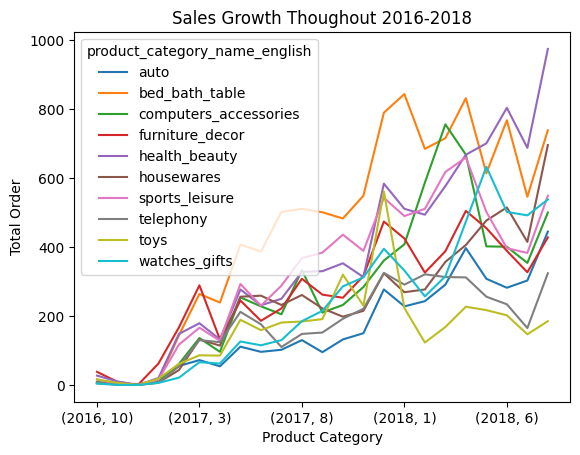

In [48]:
# visualize the data
table_plot2 = table_2.plot(kind='line')
table_plot2.set_title("Sales Growth Thoughout 2016-2018")
table_plot2.set_xlabel("Product Category")
table_plot2.set_ylabel("Total Order")